In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



Importation

In [10]:
#loading data
data_path = r"D:\AICourse\dataset\Experience-Salary.csv"  # dataset path
df = pd.read_csv(data_path)

df.head()


,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [11]:
df.describe()


,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [12]:
df.isnull().sum()


exp(in months)          0
salary(in thousands)    0
dtype: int64

In [13]:
df.isnull().sum()


exp(in months)          0
salary(in thousands)    0
dtype: int64

In [19]:

# Preparing the data
X = df[['salary(in thousands)']]  # Feature
y = df['exp(in months)'] # Target


In [20]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
#Training the model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)


Slope: 0.7986086934944817
Intercept: 4.779658633995101


In [23]:
#Making prediction on test
y_pred = model.predict(X_test)

pd.DataFrame({
    "Actual Salary": y_test.values,
    "Predicted Salary": y_pred
})


,Actual Salary,Predicted Salary
0,36.878305,25.002977
1,18.422093,22.645706
2,45.011941,39.404040
3,33.782173,28.936991
4,15.909033,22.364199
...,...,...
195,21.987893,18.307557
196,10.781589,19.858954
197,13.659081,20.141373
198,24.252646,22.162070


In [24]:
#Evaluating the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4.171892984517131
MSE: 28.236604707678836
R² Score: 0.6234437457197846


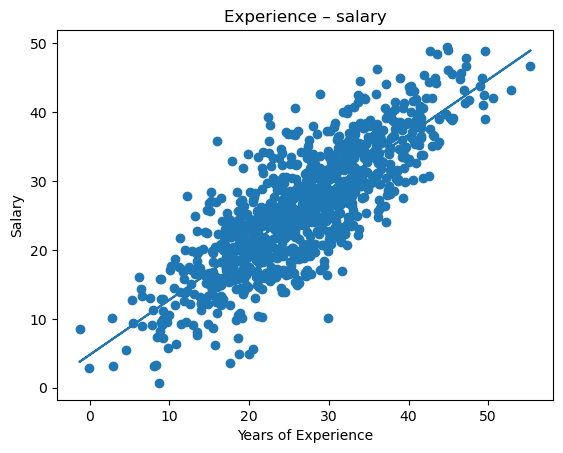

In [26]:
#Visualizing the regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience – salary")
plt.show()


In [34]:
# Predict salary for given experience values
# Create DataFrame with the EXACT same column name used during training
experience_values = pd.DataFrame([12, 24, 36, 48, 60], columns=['salary(in thousands)'])  # Changed to match training data column name

# Now predict using the correctly named DataFrame
predicted_salaries = model.predict(experience_values)

# Display predictions in a table
prediction_table = pd.DataFrame({
    'Experience(in months)': experience_values['salary(in thousands)'],  # For display purposes only
    'PredictedSalary(in thousands)': predicted_salaries
})

print("\nPredicted salaries for given experience:\n")
print(prediction_table)


Predicted salaries for given experience:

   Experience(in months)  PredictedSalary(in thousands)
0                     12                      14.362963
1                     24                      23.946267
2                     36                      33.529572
3                     48                      43.112876
4                     60                      52.696180
